In [7]:
import numpy as np
import pandas as pd
import io_data as io # requires the io_data.py provided
import itertools
import matplotlib.pyplot as plt

## Image No.1

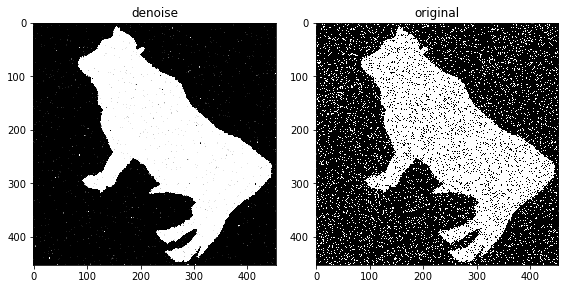

In [106]:
data,image = io.read_data('1_noise.txt', is_RGB=True, save=False, save_name=None)
X,Y = image.shape[0],image.shape[1] # given width and height limits of the graph
X,Y = Y,X
noisy = np.copy(data)


# increase the burnin and loops to get different denoise results
cleaned = Denoise(noisy,X=X,Y=Y,burnin=10,loops=10,plot=True)

## Image No.2

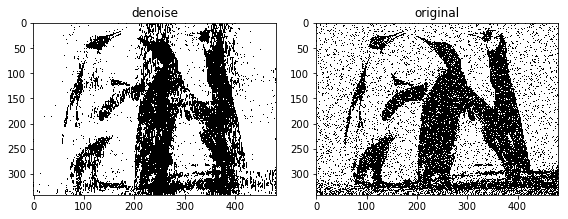

In [119]:
data,image = io.read_data('2_noise.txt', is_RGB=True, save=False, save_name=None)
X,Y = image.shape[0],image.shape[1] # given width and height limits of the graph
X,Y = Y,X
noisy = np.copy(data)
cleaned = Denoise(noisy,X=X,Y=Y,burnin=100,loops=30,plot=True)

## Image No.3

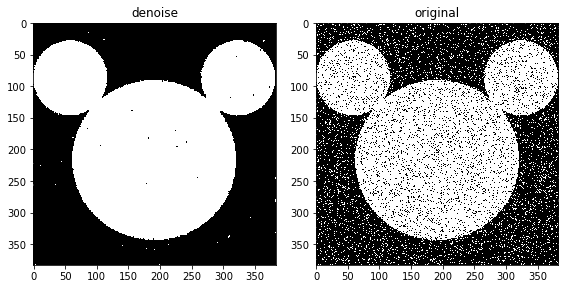

In [115]:
data,image = io.read_data('3_noise.txt', is_RGB=True, save=False, save_name=None)
X,Y = image.shape[0],image.shape[1] # given width and height limits of the graph
X,Y = Y,X
noisy = np.copy(data)
cleaned = Denoise(noisy,X=X,Y=Y,burnin=15,loops=10,plot=True)

## Image No.4

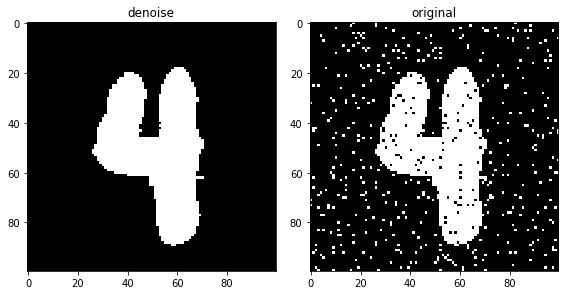

In [116]:
data,image = io.read_data('4_noise.txt', is_RGB=True, save=False, save_name=None)
X,Y = image.shape[0],image.shape[1] # given width and height limits of the graph
X,Y = Y,X
noisy = np.copy(data)
cleaned = Denoise(noisy,X=X,Y=Y,burnin=10,loops=10,plot=True)

### Below are the implementations:

In [47]:
# X,Y are the max limit on X and Y
def get_neighbour(no,X,Y,data):
    # data be in the shape of (X,Y,3)
    # X represents the row size
    row,col = no // X,no %  X
    neighbours,neighbour_values = [],[]
    if row > 0:
        neighbours.append(no - X )
        neighbour_values.append(data[no - X][2]) 
    if col > 0:
        neighbours.append(no - 1 )  
        neighbour_values.append(data[no - 1][2]) 
    if row < Y-1:
        neighbours.append(no + X )
        neighbour_values.append(data[no + X][2]) 
    if col < X-1:
        neighbours.append(no + 1)
        neighbour_values.append(data[no + 1][2]) 
    return neighbours,neighbour_values

In [113]:
def Denoise(noisy_data,X,Y, burnin = 10, loops = 10,plot=False):
    
    current_data = np.copy(noisy_data)
    current_data[:,2] = (current_data[:,2]/255-0.5)*2 # normalise to {-1,1} binary
    avg = np.zeros_like(current_data[:,2]).astype(np.float64) # used later for sampling
    
    for i in range(burnin+loops):
        
        for no in range(len(current_data)):
    
            neighbours,neighbour_values = get_neighbour(no,X,Y,current_data)
            neighbour_pairwise = sum(neighbour_values)

            # compute the probability that Ys is 1            
            Xs = noisy_data[no][2]
            if Xs == 0:
                # simplified closed form: from e^a/(e^a+e^b) = 1/(1+e^(b-a))
                # the local evidence is obtained based on a Gaussian distribution
                prob_one = 1/(1+np.exp(-2*neighbour_pairwise - ((-1)-(-1))**2 + ((1)-(-1))**2))
            else:
                prob_one = 1/(1+np.exp(-2*neighbour_pairwise - ((-1)-(1))**2 + ((1)-(1))**2))

            if np.random.uniform() <= prob_one:
                current_data[no][2] = 1 
            else:
                current_data[no][2] = -1 

        if i > burnin:
            avg += current_data[:,2]
    
    avg = (avg>0).astype(int)
     
    if plot:
        
        fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,8))

        ax1.set_title('denoise')
        im1 = ax1.imshow(np.transpose(avg.reshape(X,Y)),cmap='gray')

        ax2.set_title('original')
        im2 = ax2.imshow(np.transpose(noisy_data[:,2].reshape(X,Y)),cmap='gray')

        plt.tight_layout()
        plt.subplots_adjust(top=0.85)
        plt.show()
    return avg